## Sección 1 comparación

In [12]:
# importación de librerías importantes
%matplotlib inline
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from sklearn.cluster import KMeans
from kneed import KneeLocator

# obtención de los datos
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :] 
df = pd.DataFrame(X, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

# cargar los datos
X = df[['sepal length', 'sepal width']].values

In [13]:
# calcular el valor de inercia para cada número de clusters
inercias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

# encontrar el número óptimo de clusters utilizando la librería kneed
kl = KneeLocator(range(1, 11), inercias, curve="convex", direction="decreasing")
num_clusters = kl.elbow

print("Número de clusters ideal: ", num_clusters)

Número de clusters ideal:  3


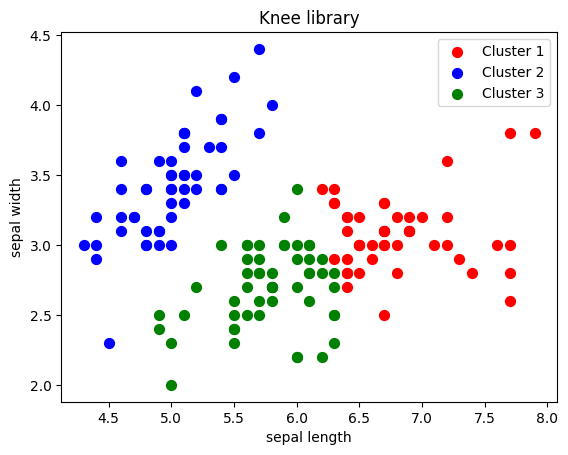

In [14]:
# ajustar un modelo KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=20)
kmeans.fit(X)

# asignar etiquetas de cluster a cada punto de datos
labels = kmeans.predict(X)

# graficar los datos con diferentes colores para cada cluster
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.title('Knee library')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

## Sección 2 comparación

In [15]:
# obtención de los datos
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :] 
df = pd.DataFrame(X, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

# cargar los datos
X = df[['petal length', 'petal width']].values

In [16]:
# calcular el valor de inercia para cada número de clusters
inercias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(X)
    inercias.append(kmeans.inertia_)

# encontrar el número óptimo de clusters utilizando la librería kneed
kl = KneeLocator(range(1, 11), inercias, curve="convex", direction="decreasing")
num_clusters = kl.elbow

print("Número de clusters ideal: ", num_clusters)

Número de clusters ideal:  2


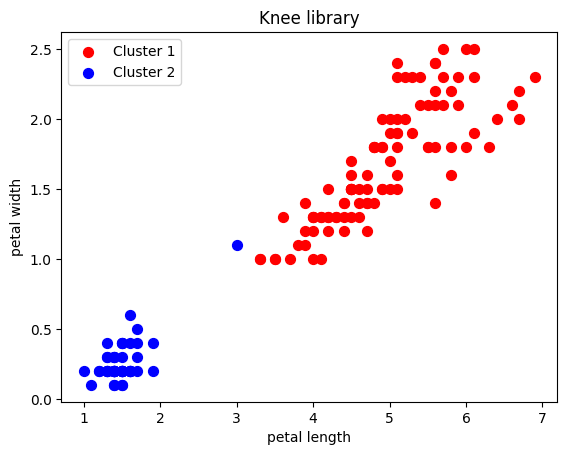

In [18]:
# ajustar un modelo KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=20)
kmeans.fit(X)

# asignar etiquetas de cluster a cada punto de datos
labels = kmeans.predict(X)

# graficar los datos con diferentes colores para cada cluster
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.title('Knee library')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

## Conclusiones

- Sección 1:
    - Luego de realizar la implementación con la librería kneed y encontrar el mejor número de clusters dado la inercia que se obtiene de cada implementación del modelo de K-Means se observa que se obtuvo el mismo número de clusters lo que indica un par de cosas. Primero, la implementación manual es correcta porque se obtuvo el mismo valor y, segundo, la respuesta tiene sentido ya que según la naturaleza de los datos y su contenido se muestra que existen 3 tipos de flores por lo que deberían haber 3 grupos (clusters) de datos y esto se observa mejor en las gráficas mostradas en el apartado de comparación.
<br>
- Sección 2:
    - De igual manera que en la anterior sección se trabajó con diferentes valores para el número de clusters y en base a sus inercias, y la librería kneed, se pudo llegar al resultado ideal, que fue de 2 clusters. A diferencia de la implementación manual este resultado varió por un número menos de clusters; En la implementación manual se mantuvo la cantidad de 3 clusters. Esta diferencia pudo deberse a que los datos reflejan que dado el sépalo es posible diferenciar 3 tipos de flores pero dados sus pétalos esto cambia ya que poseen características muy similares que reducen el número a 3 tipos de flores y es posible confundir dos tipos diferentes de flores porque las características de sus pétalos son similares. Entonces tiene sentido que el modelo pueda asumir que son solo dos clústers dada la naturaleza de los datos.
<br>
- Conclusiones:
    - Si los datos son más dispersos o menos separables el número óptimo de clusters será menor al de datos que sean más separables o distinguibles.
    - Dada la naturaleza de los datos con los que se trabajó, es más sencillo diferenciar los tipos de flores por las características de su sépalo y no tanto por las características de sus pétalos.
    - El modelo K-means clustering ayuda a identificar patrones, reducir la complejidad, segmentar los datos y es sencillo de implementar. Además de esto ofrece gráficas muy fáciles de leer y analizar.
